<a href="https://colab.research.google.com/github/loganhooker02/hookermachinelearning/blob/main/assignment2q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
#ECGR 5105 HW 2 Q3
#By Logan Hooker

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
from sklearn.model_selection import train_test_split
#import dataset
url = 'Housing.csv'

In [41]:
#read csv into a dataframe
housing = pd.read_csv(url)
#check for matrix size and null values


In [42]:
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_map(x): #turn yes into 1, no into 0
    return x.map({'yes': 1, 'no': 0})

# Applying function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [43]:
np.random.seed(0)
# split the dataset into the Training set and Validation set, set 20% as validation
train, val = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
22,8645000,8050,3,1,1,1,1,1,0,1,1,0,furnished
41,7840000,6360,3,2,4,1,0,0,0,1,0,1,furnished
91,6419000,6750,2,1,1,1,1,1,0,0,2,1,furnished
118,5950000,6420,3,1,1,1,0,1,0,1,0,1,furnished
472,3010000,3630,4,1,2,1,0,0,0,0,3,0,semi-furnished


In [44]:
#create column vectors
train_price = train.values[:,0]
val_price = val.values[:,0]
#add few necessary variables
theta_a = np.zeros(6)
theta_b = np.zeros(12)
iterations = 1500
#length of frames
train_len = len(train_price)
val_len = len(val_price)


#Part A uses area, bedrooms, bathrooms, stories, parking
vars_a = ['area','bedrooms','bathrooms','stories','parking']
train_a = np.c_[np.ones((train_len, 1)), train[vars_a]]
val_a = np.c_[np.ones((val_len, 1)), val[vars_a]]


#Part B uses area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea
vars_b = ['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea']
train_b = np.c_[np.ones((len(train_price), 1)), train[vars_b]]
val_b = np.c_[np.ones((len(val_price),1)), val[vars_b]]


In [45]:
#Normalize
from sklearn.preprocessing import MinMaxScaler


#Normalize Inputs
normal = MinMaxScaler()
m = len(train)
m_val = len(val)
scalevars = ['area','bedrooms','bathrooms','stories','parking','price']
train_norm = train
val_norm = val
train_norm[scalevars] = normal.fit_transform(train_norm[scalevars])
val_norm[scalevars] = normal.fit_transform(val_norm[scalevars])

theta2aN = np.zeros(6)
theta2bN = np.zeros(12)


#normalized training matrices
train3a_norm = np.c_[np.ones((m, 1)), train_norm[vars_a]]
train3b_norm = np.c_[np.ones((m,1)), train_norm[vars_b]]
#normalized val matrices
val3a_norm = np.c_[np.ones((m_val,1)), val_norm[vars_a]]
val3b_norm = np.c_[np.ones((m_val,1)), val_norm[vars_b]]



#Standarize Inputs
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()

#same variables from normalization

train_stan = train
val_stan = val

theta3aS = np.zeros(6)
theta3bS = np.zeros(12)

train_stan[scalevars] = standard.fit_transform(train_stan[scalevars])
val_stan[scalevars] = standard.fit_transform(val_stan[scalevars])

#standardize training matrices
train3a_stand = np.c_[np.ones((m,1)), train_stan[vars_a]]
train3b_stand = np.c_[np.ones((m,1)), train_stan[vars_b]]
#standardize validation matrices
val3a_stand = np.c_[np.ones((m_val, 1)), val_stan[vars_a]]
val3b_stand = np.c_[np.ones((m_val, 1)), val_stan[vars_b]]



In [46]:
#Problem 3

#Add parameter penalties to the descent function
def gradient_descent_pen(train, test, price_train, price_test, alpha, theta, iterations, lambdaa):
    train_losses = []
    val_losses = []

    for iteration in range(iterations):

        error = train.dot(theta) - price_train
        gradients = 2/len(train) * (train.T.dot(error) + lambdaa * theta)
        theta = theta - alpha * gradients

        train_loss = (1/len(train)) * (np.sum(np.square(train.dot(theta) - price_train)))
        val_loss = (1/len(test)) * np.sum(np.square(test.dot(theta) - price_test))

        train_losses.append(train_loss)
        val_losses.append(val_loss)

    return train_losses, val_losses

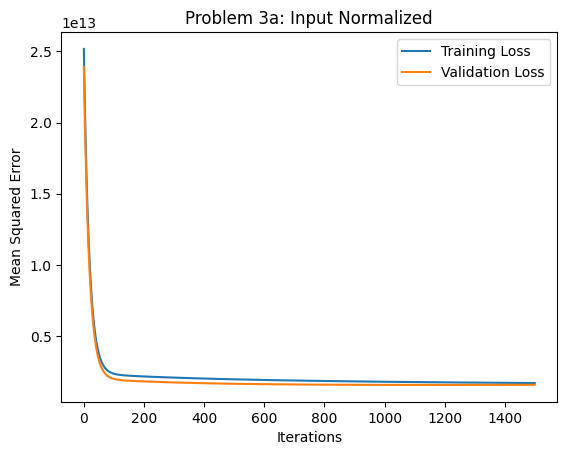

1690696658872.812

1557954805502.2007

132741853370.61133

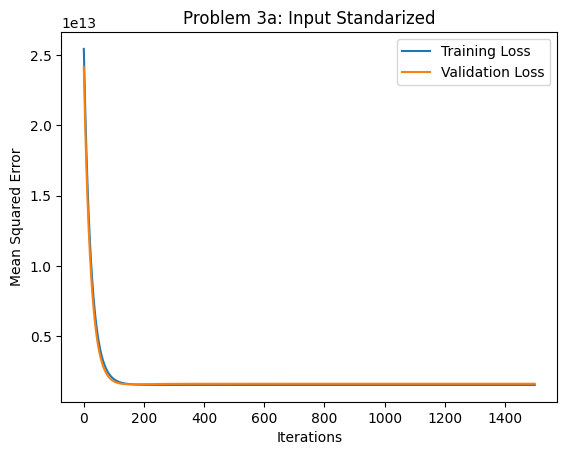

1522195215357.7083

1564956515303.6973

42761299945.98901

In [49]:
#Problem 3a

lambda3an = 1;
theta3aN = np.zeros(6)
alpha_3an = 0.01

train_loss_3an, val_loss_3an = gradient_descent_pen(train3a_norm, val3a_norm, train_price, val_price, alpha_3an, theta3aN, iterations, lambda3an)
plt.plot(train_loss_3an, label="Training Loss")
plt.plot(val_loss_3an, label="Validation Loss")
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Problem 3a: Input Normalized")
plt.show()
display(min(train_loss_3an))
display(min(val_loss_3an))
display(abs(min(train_loss_3an)-min(val_loss_3an)))

lambda3as = 1
alpha_3as = 0.01
theta3aS = np.zeros(6)

train_loss_3as, val_loss_3as = gradient_descent_pen(train3a_stand, val3a_stand, train_price, val_price, alpha_3as, theta3aS, iterations, lambda3as)
plt.plot(train_loss_3as, label="Training Loss")
plt.plot(val_loss_3as, label="Validation Loss")
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Problem 3a: Input Standarized")
plt.show()
display(min(train_loss_3as))
display(min(val_loss_3as))
display(abs(min(train_loss_3as)-min(val_loss_3as)))

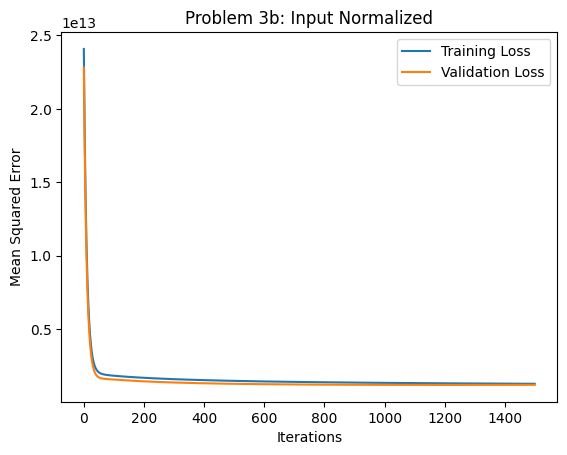

1261488737781.8362

1183994069031.7732

77494668750.06299

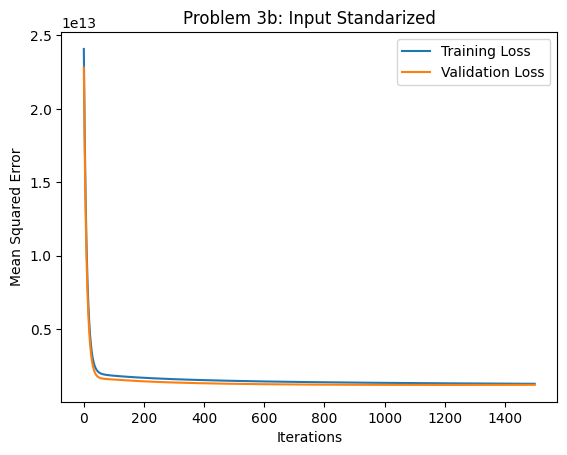

1159608495332.4507

1224260701514.8662

405348019971.2466

In [51]:
#Problem 3b

lambda3bn = 1;
theta3bN = np.zeros(12)
alpha_3bn = 0.01

train_loss_3bn, val_loss_3bn = gradient_descent_pen(train3b_norm, val3b_norm, train_price, val_price, alpha_3bn, theta3bN, iterations, lambda3bn)
plt.plot(train_loss_3bn, label="Training Loss")
plt.plot(val_loss_3bn, label="Validation Loss")
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Problem 3b: Input Normalized")
plt.show()
display(min(train_loss_3bn))
display(min(val_loss_3bn))
display(abs(min(train_loss_3bn)-min(val_loss_3bn)))

lambda3bs = 1
alpha_3bs = 0.01
theta3bS = np.zeros(12)

train_loss_3bs, val_loss_3bs = gradient_descent_pen(train3b_stand, val3b_stand, train_price, val_price, alpha_3bs, theta3bS, iterations, lambda3bs)
plt.plot(train_loss_3bn, label="Training Loss")
plt.plot(val_loss_3bn, label="Validation Loss")
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Problem 3b: Input Standarized")
plt.show()
display(min(train_loss_3bs))
display(min(val_loss_3bs))
display(abs(min(train_loss_3bs)-min(val_loss_3as)))